# Eksploratorna analiza skupa podataka

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Učitavamo skupove podataka za treniranje i testiranje, te na njima radimo osnovnu analizu podataka.

In [2]:
train=pd.read_csv('train.tsv', sep='\t') #učitavanje training tablice
test=pd.read_csv('test.tsv', sep='\t') #učitavanje test tablice

Skup za treniranje ima 1.482.535 redaka i 8 stupaca, dok skup za testiranje ima 693.359 redaka i 7 stupaca.

In [3]:
train.shape

(1482535, 8)

In [4]:
test.shape

(693359, 7)

Prikažimo tipove varijabli:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
test_id              693359 non-null int64
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


In [7]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [8]:
train.set_index('train_id', inplace=True) # stavimo da train_id bude indeks, onaj kojeg pandas kreira je nepotreban
test.set_index('test_id', inplace=True)

In [9]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [10]:
train.dtypes # vrste podataka

name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [11]:
train.drop_duplicates(keep="first")

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


Promotrimo opis target varijable-price:

In [12]:
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

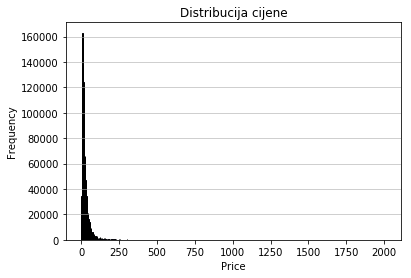

In [30]:
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribucija cijene')
plt.hist(train['price'], color = 'blue', edgecolor = 'black',
    bins = 1000)
plt.show()

In [14]:
najskuplji=train.sort_values(by ='price', ascending=False).head(5)
najskuplji

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ..."
1262245,NEW-Chanel Boy Wallet o Chain WOC Caviar,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2006.0,0,Brand: Chanel Style: WOC Boy Wallet on Chain T...
1393600,David Yurman Wheaton ring,2,Women/Jewelry/Rings,David Yurman,2004.0,0,David Yurman Wheaton wing. Size 6. Original re...
742113,Chanel Chevron Fuschia Pink 2,1,Women/Women's Handbags/Shoulder Bag,Chanel,2000.0,1,Authentic Brand new The price for this is [rm]...
956343,Chanel Black wallet on chain,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2000.0,1,Lambskin Color is Black with dark Silver Hardw...


In [15]:
najjeftiniji=train.sort_values(by ='price', ascending=True).head(5)
najjeftiniji
# Tko zna je li ovo greška ili to tako treba biti...

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
1079043,Modern + Pillow New!,1,Home/Home Décor/Home Décor Accents,NaN,0.0,0,Accent pillows liven up a room & give it insta...
644432,Hawaiian Blue leggings in One Size,1,"Women/Athletic Apparel/Pants, Tights, Leggings",Independent,0.0,1,"Buttery soft, super comfy leggings. These are ..."
461372,Lululemon lavender skort,3,"Women/Athletic Apparel/Skirts, Skorts & Dresses",Lululemon,0.0,0,Great condition!! No flaws. Only worn a few ti...
788994,PEACOCK FEATHERS 3M POPSOCKET PHONE GRIP,1,Electronics/Cell Phones & Accessories/Cell Pho...,PopSockets,0.0,1,LATEST DESIGN! PEACOCK FEATHERS 3M Pop expanda...
996618,Jordan's Authentic Toddler Shoes,3,Kids/Boys 2T-5T/Shoes,NaN,0.0,0,Size 6C. Need a little cleaning because they h...


### Nadopunjavanje stupca "brandovi"

S obzirom da prilično velik broj nedostajućih vrijednosti za stupac "brandovi", pokušat ćemo nadopuniti neke vrijednosti iz stupca "name", jer se tamo, bar koliko se može primijetiti iz ispisanih vrijednosti, često pojavljuje i ime marke. 

In [21]:
brandovi2=train['brand_name']
brandovi1=test['brand_name']

In [22]:
brandovi1.nunique() #broj jedinstvenih imena brendova

3900

In [23]:
svi_brandovi=set(brandovi1.values)
for y in brandovi2:
    svi_brandovi.add(y)
svi_brandovi = {x for x in svi_brandovi if pd.notna(x)}
len(svi_brandovi)

5289

In [24]:
train.brand_name.fillna(value='unknown', inplace=True)
test.brand_name.fillna(value='unknown', inplace=True)
missing_brands = sum(train['brand_name'] == 'unknown')
missing_brands_test = sum(test['brand_name'] == 'unknown')
missing_brands, missing_brands_test

632682

Prolazimo kroz training set i tražimo podudaranja između imena i skupa svih brandova.

In [25]:
def trazilica(objekt):
    brand=objekt[0]
    ime=objekt[1]
    if brand=='unknown':
        for i in ime:
            if i in svi_brandovi:
                return ime
    if brand in svi_brandovi:
        return ime
    return brand
train['brand_name']=train[['brand_name', 'name']].apply(trazilica, axis=1)
test['brand_name']=test[['brand_name', 'name']].apply(trazilica, axis=1)

In [28]:
missing_brands = sum(train['brand_name'] == 'unknown')
missing_brands_test = sum(test['brand_name'] == 'unknown')
missing_brands, missing_brands_test

(489074, 228370)

### Analiza brandova

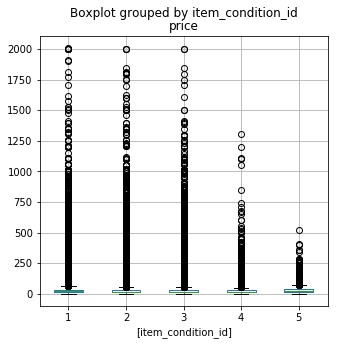

In [21]:
fig = plt.figure(figsize=[5, 5]) 
ax1 = fig.add_subplot(111)
train.dropna().boxplot(column = 'price',  by = ['item_condition_id'], ax= ax1)

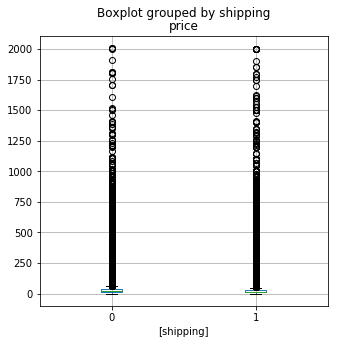

In [22]:
fig = plt.figure(figsize=[5, 5]) 
ax1 = fig.add_subplot(111)
train.dropna().boxplot(column = 'price',  by = ['shipping'], ax= ax1)

### Analiza opisa 

In [12]:
from textblob import TextBlob

In [13]:
df=pd.read_csv('train.tsv', sep='\t') #učitavanje training tablice

In [14]:
df = df[~df['item_description'].isnull()]
df = df[df['item_description']!='No description yet']

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

df['item_description'] = preprocess(df['item_description'])

df.insert(loc=len(df.columns), column='polarity', value=0)
df.insert(loc=len(df.columns), column='word_count', value=0)


In [15]:

df['polarity'] = df['item_description'].map(lambda text: TextBlob(text).sentiment.polarity)
df['description_length'] = df['item_description'].astype(str).apply(len)
df['word_count'] = df['item_description'].apply(lambda x: len(str(x).split()))

In [16]:
print('Pet nasumičnih opisa najpozitivnijeg tona: \n')
cl = df.loc[df.polarity == 1, ['item_description']].sample(5).values
for c in cl:
    print(c[0])

Pet nasumičnih opisa najpozitivnijeg tona: 

Excellent used condition. Will combine shipping.
Tested and working Authentic!!!!!
Excellent Condition.
Be awesome!
Worn once. Washed per LLR instructions. Excellent condition.


In [17]:
print('Pet nasumičnih opisa neutralnog tona: \n')
c2 = df.loc[df.polarity == 0, ['item_description']].sample(5).values
for c in c2:
    print(c[0])

Pet nasumičnih opisa neutralnog tona: 

9 Magnum condoms not opened Box was opened and one was used Expiration is 11-01-2019
Nwot Strapless
2 justice tops
(2) pumpkin spice (1) white chocolate peppermint (3) Vanilla. Expires 11/2017. The pumpkin and white chocolate is 200 calories 22 grams of protein. The vanilla is 210 calories 24 grams of protein
LuLaRoe Outfit SZ 14 Gracie, Tween leggings


In [18]:
print('Pet nasumičnih opisa negativnog tona: \n')
c3 = df.loc[df.polarity == -1, ['item_description']].sample(5).values
for c in c3:
    print(c[0])

Pet nasumičnih opisa negativnog tona: 

Blueray movie Resident Evil degeneration no scratches
Bag of wood bead and evil eyes
Chaos comics 1992. VF to NM Evil Ernie the resurrection #1, #2, #4.
Bought but never used .. :'(
Floral romper as seen on nasty gal and Tobi


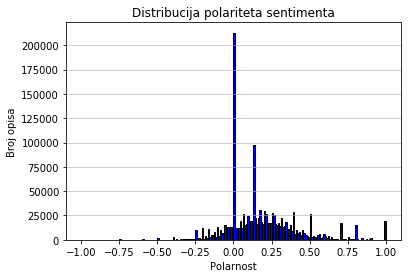

In [19]:
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Polarnost')
plt.ylabel('Broj opisa')
plt.title('Distribucija polariteta sentimenta')
plt.hist(df['polarity'], color = 'blue', edgecolor = 'black',
    bins = 200)
plt.show()

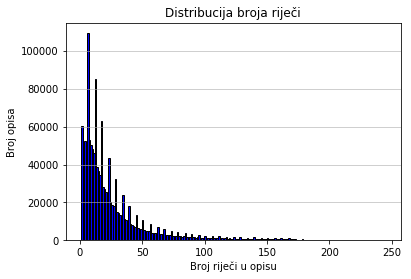

In [20]:
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Broj riječi u opisu')
plt.ylabel('Broj opisa')
plt.title('Distribucija broja riječi')
plt.hist(df['word_count'], color = 'blue', edgecolor = 'black',
    bins = 200)
plt.show()

In [21]:
df['polarity'].corr(df['price'])

0.014931981714400463

In [22]:
df['word_count'].corr(df['price'])

0.044540842125181446

Tražimo najčešće korištene riječi u opisima:

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['item_description'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['item_description' , 'count'])

new 499697
size 456225
brand 274491
free 271222
condition 256095
shipping 227052
rm 225061
worn 187194
used 184345
great 154554
black 153516
price 151228
bundle 126193
color 123810
pink 123012
small 117644
like 114691
good 105608
box 101634
tags 101427


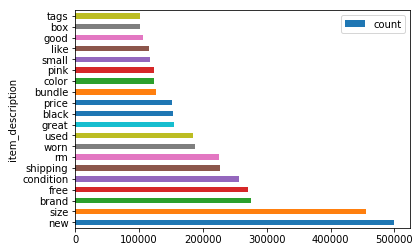

In [33]:
df2.plot.barh(x='item_description', y='count', rot=0)

In [34]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['item_description'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['item_description' , 'count'])

brand new 238158
free shipping 116795
price firm 68282
great condition 64385
good condition 63990
new tags 62223
free home 47765
smoke free 46510
like new 45747
size small 42089
victoria secret 40429
size medium 36084
excellent condition 35089
bundle save 34914
new box 29254
size large 28783
super cute 27705
new used 27312
rm rm 25932
new worn 22421


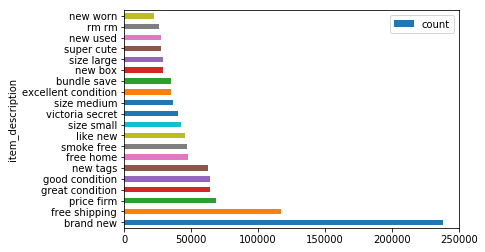

In [35]:
df3.plot.barh(x='item_description', y='count', rot=0)